In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
from scipy.io import loadmat
#import keras 


# Dream Prediction Project 

## Data Habituation and Tool Familiarization

In [4]:
#chunksize = 10 ** 6
#for chunk in pd.read_csv("DreamsData/JL1.txt", sep='\t', chunksize=chunksize, nrows=100):
#    display(chunk)

eeg = pd.read_table("JL1.txt", sep='\t', nrows=10000, dtype=float)
eegDF = pd.DataFrame(eeg)

FileNotFoundError: File b'JL1.txt' does not exist

In [102]:
eegDF.columns

Index([' ', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9',
       ...
       'E249', 'E250', 'E251', 'E252', 'E253', 'E254', 'E255', 'E256', 'Cz',
       'Unnamed: 258'],
      dtype='object', length=259)

In [103]:
eegDF['E1'].dtype

dtype('float64')

In [104]:
eegDF[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9','E10']].head(3)

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,1.8086,1.4188,0.8653,-0.5584,-0.7759,-1.1366,-0.6732,0.2398,0.7695,-0.2247
1,1.1981,0.8375,0.2199,-1.2044,-1.3126,-1.5867,-0.9807,0.0964,0.7827,-0.9865
2,1.6655,1.2592,0.6380,-1.0783,-1.0226,-1.4558,-0.9809,-0.1861,-0.1658,-0.6797


In [105]:
eegDF = eegDF.drop('Unnamed: 258', axis=1)

In [106]:
eegDF.loc[:,'E256':].head()

,E256,Cz
0,1.7408,0.0
1,0.8659,0.0
2,0.6804,0.0
3,-0.3693,0.0
4,-1.5400,0.0


In [107]:
eegM = eegDF.as_matrix()

C:\Users\ezgi.yuceturk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [108]:
eegM.shape

(15000, 258)

In [109]:
eegM[:,1].shape

(15000,)

In [110]:
EEGM_x = eegM[:,1:257]
EEGM_y = eegM[:,257:]

In [111]:
#columns become time indexes
eeg_x = EEGM_x.T

In [112]:
eeg_x.shape

(256, 15000)

In [124]:
x = np.arange(0,500)

In [125]:
y=eeg_x[0,:500]

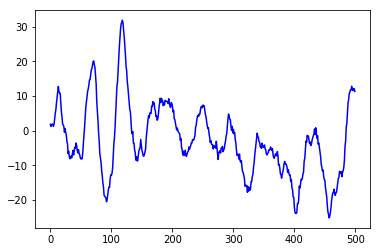

In [126]:
plt.plot(x, y, 'b-')

In [127]:
eeg_x 

array([[ 1.8086,  1.1981,  1.6655, ...,  4.4724,  2.7181,  1.603 ],
       [ 1.4188,  0.8375,  1.2592, ...,  4.4807,  3.0872,  2.7403],
       [ 0.8653,  0.2199,  0.638 , ...,  4.1676,  3.8425,  4.3055],
       ...,
       [-0.0601, -0.8696, -1.2014, ...,  4.7323,  1.4015, -0.7933],
       [ 1.2186,  0.3352, -0.0208, ...,  5.1775,  2.3874,  0.228 ],
       [ 1.7408,  0.8659,  0.6804, ...,  5.4165,  3.1224,  1.067 ]])

In [130]:
#Each row is time where each column is electrode
#Reshape to 100 frame of 6x6
# E1----------E6
# E7---------E12
# E13--------E18
# E19--------E24
# E25--------E30
# E31-----...E31

mini_0 = EEGM_x[:100,:36] 
mini_0 = mini_0.reshape(100,6,6)

In [131]:
mini_0

array([[[  1.8086,   1.4188,   0.8653,  -0.5584,  -0.7759,  -1.1366],
        [ -0.6732,   0.2398,   0.7695,  -0.2247,  -0.6889,  -3.1479],
        [ -2.5286,  -2.6914,  -2.3159,  -1.2909,  -0.5224,  -3.2174],
        [ -4.9775,  -5.3124,  -3.5237,  -3.5303,  -2.0763,  -0.4156],
        [ -6.0382,  -6.0484,  -5.7789,  -4.0708,  -3.0937,  -1.416 ],
        [ -6.2098,  -6.3896,  -5.5642,  -5.7429,  -2.9536,  -2.5221]],

       [[  1.1981,   0.8375,   0.2199,  -1.2044,  -1.3126,  -1.5867],
        [ -0.9807,   0.0964,   0.7827,  -0.9865,  -1.4379,  -3.8889],
        [ -3.3237,  -3.4529,  -2.9244,  -1.8332,  -0.9094,  -3.8445],
        [ -5.7397,  -6.083 ,  -4.4216,  -4.3937,  -2.8613,  -1.2273],
        [ -6.7862,  -6.9194,  -6.7626,  -5.096 ,  -4.1498,  -2.3292],
        [ -6.9328,  -7.2763,  -6.6783,  -6.7884,  -4.0578,  -3.5455]],

       [[  1.6655,   1.2592,   0.638 ,  -1.0783,  -1.0226,  -1.4558],
        [ -0.9809,  -0.1861,  -0.1658,  -0.6797,  -1.3982,  -3.5506],
        [ -2.982

[ 1.8086  1.4188  0.8653 -0.5584 -0.7759 -1.1366 -0.6732  0.2398  0.7695
 -0.2247 -0.6889 -3.1479 -2.5286 -2.6914 -2.3159 -1.2909]


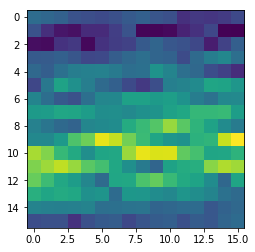

[ 1.1981  0.8375  0.2199 -1.2044 -1.3126 -1.5867 -0.9807  0.0964  0.7827
 -0.9865 -1.4379 -3.8889 -3.3237 -3.4529 -2.9244 -1.8332]


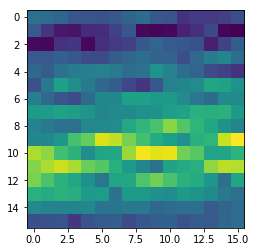

[ 1.6655  1.2592  0.638  -1.0783 -1.0226 -1.4558 -0.9809 -0.1861 -0.1658
 -0.6797 -1.3982 -3.5506 -2.9825 -3.2708 -2.8797 -1.8701]


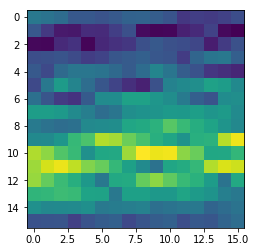

[ 1.8878  1.7714  1.1789 -0.4646 -0.8957 -1.3562 -1.2605 -0.7494 -0.1016
 -0.3377 -0.6377 -2.968  -2.4346 -2.7798 -2.7569 -2.0799]


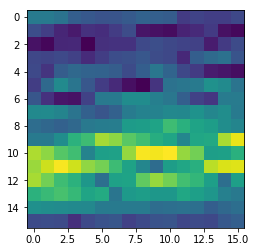

[ 1.7825  1.9782  1.5889 -0.3646 -0.6031 -1.2322 -1.2878 -0.8178 -0.7515
 -0.5946 -0.7367 -2.7031 -2.0716 -2.4417 -2.646  -2.0492]


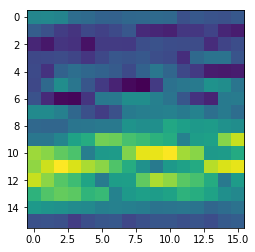

[ 1.2104  1.792   1.7043 -0.1837 -0.5703 -1.0803 -1.1558 -0.7031 -0.8543
 -1.1572 -0.8589 -2.9069 -1.9729 -2.3497 -2.6044 -1.9236]


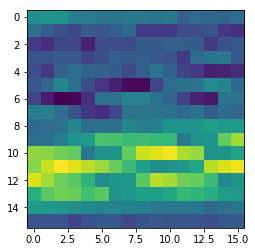

[ 1.8602  2.7042  2.3977  0.3225  0.0661 -1.1101 -1.5536 -1.223  -1.3109
 -0.8396 -0.1419 -1.9114 -1.1399 -2.3206 -2.754  -2.3485]


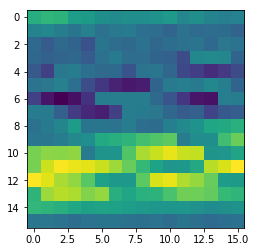

[ 3.4381  4.5657  4.71    2.3847  1.8883  0.5362  0.0308  0.2478 -0.8002
  0.8897  1.7821  0.0401  0.9901 -0.1917 -0.9849 -0.4688]


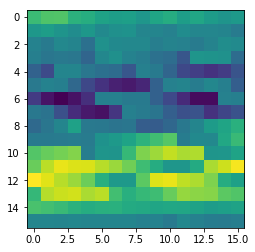

[ 5.0287  5.9621  5.4948  3.6938  2.5362  1.4097  0.7652  0.4765 -1.2721
  3.1575  3.3716  0.9094  1.5071  0.3606 -0.1013  0.059 ]


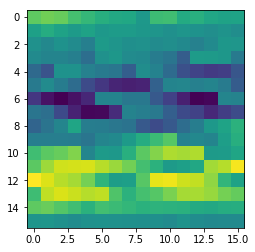

[ 6.1237  6.856   6.2778  3.9538  3.6799  2.0621  1.6862  1.834  -0.2042
  4.0933  3.8714  2.0891  2.8737  1.5748  1.1848  1.4912]


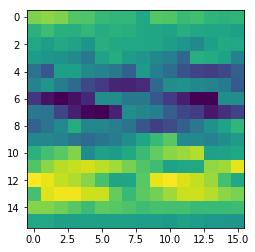

[8.069  8.6329 7.9315 5.8827 5.2364 3.3107 2.9301 2.9734 1.1713 6.5505
 6.2703 4.2452 4.7774 3.1899 2.7505 2.9554]


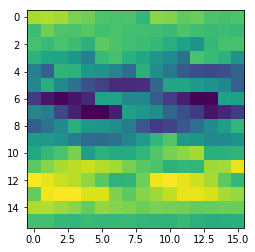

[ 9.5856 10.0573  9.191   7.5115  6.4157  5.1077  4.6829  4.1997  1.057
  8.6943  7.9723  5.595   6.0191  4.8365  4.5953  4.5932]


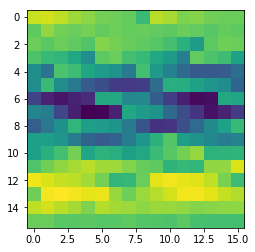

[10.8402 10.5772  9.3585  7.8804  6.4786  6.0577  6.0784  5.529   2.3469
 10.7918  8.7372  6.1855  6.1991  6.0727  6.0419  5.9252]


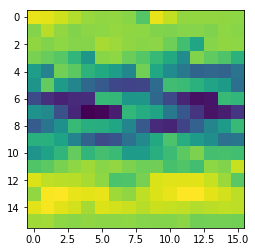

[12.7187 11.9828 10.2098  8.671   6.7521  7.2527  7.3777  6.7643  3.4904
 13.0855  9.8073  7.0721  6.7985  7.6003  7.507   6.9388]


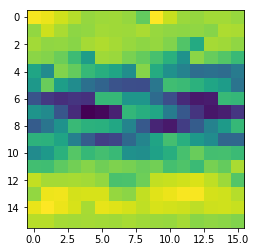

[11.3017 10.8627  9.2863  8.524   6.6434  7.5942  7.8635  7.2049  4.0321
 12.2193  9.5413  6.9115  6.8113  7.9503  8.2205  7.7247]


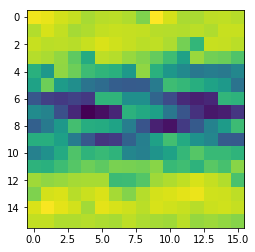

[10.8311  9.8904  7.9142  7.3531  5.5433  7.1664  7.8613  7.5703  4.8757
 12.2924  8.5423  5.9111  5.6519  7.4688  8.1771  7.6689]


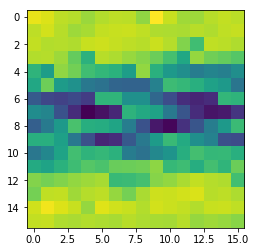

[10.7512 10.3314  8.804   8.6897  6.3136  8.1011  8.6057  8.0663  4.8177
 12.8593  9.7132  6.9442  6.8145  8.4767  9.0321  8.4   ]


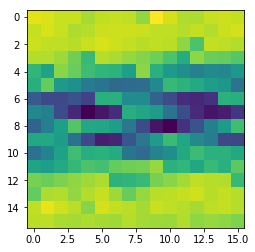

[ 8.1078  7.5896  6.027   5.8701  4.8889  7.2219  8.2781  8.2373  5.4639
 10.1757  6.7695  5.0179  5.1198  7.5971  8.7474  8.2875]


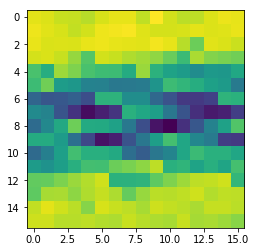

[5.3232 5.2437 4.1709 4.3752 3.9293 6.7742 8.1142 8.4366 6.4497 7.4539
 4.7042 3.3674 3.7749 6.6749 8.2172 8.0429]


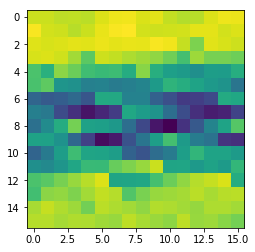

[3.8296 3.8385 2.9621 3.5913 3.3229 6.4489 8.2254 8.6565 6.0528 6.6017
 3.7589 2.2659 2.8507 5.7654 7.8949 8.0367]


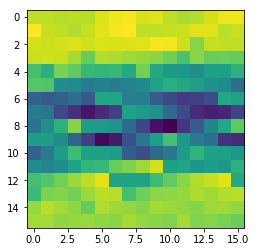

[1.9076 2.1591 1.5443 2.0569 2.6208 5.7742 7.7446 8.566  6.8399 4.665
 1.9894 1.1855 1.9286 5.0293 7.3162 7.4943]


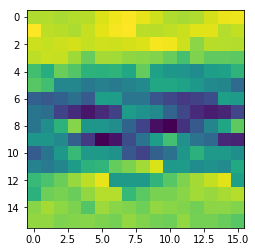

[1.5933 2.0033 1.8649 2.1543 2.878  6.0533 7.8924 8.5737 6.5299 4.4972
 1.9006 1.3127 2.2542 5.3775 7.4956 7.7735]


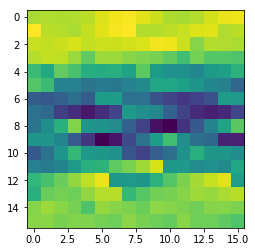

[1.2099 1.8455 1.7207 2.2027 3.0261 5.8886 7.7903 8.3622 6.0905 4.1155
 1.9159 1.5174 2.3086 5.2639 7.4226 7.7012]


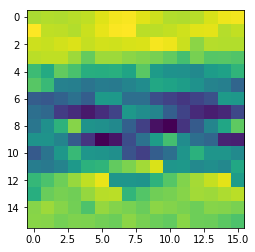

[-0.4661  0.2734  0.5824  1.3271  2.2478  5.3992  7.5257  8.0981  6.057
  2.7117  0.8343  0.486   1.4928  4.745   7.0192  7.5681]


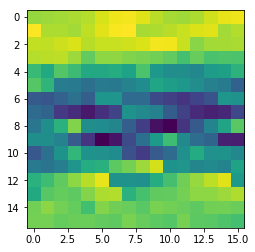

[0.5738 1.2195 1.3506 1.8592 2.288  4.9725 6.8882 7.1626 5.1097 3.6437
 1.9046 1.2913 1.8944 4.7508 6.5859 7.0053]


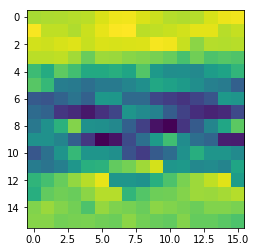

[-0.4921  0.2184  0.6329  1.4361  1.7789  4.3006  6.3191  6.3053  4.024
  2.6308  1.3919  0.9313  1.5052  4.246   5.9833  6.5758]


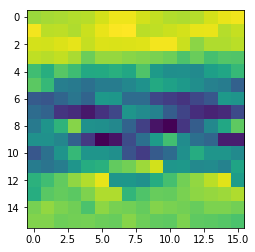

[-1.2383e+00 -8.0000e-01 -4.6480e-01  5.0000e-03  1.3280e-01  2.8377e+00
  4.9594e+00  5.2349e+00  4.1442e+00  1.6189e+00  2.0420e-01 -3.3400e-01
  1.1770e-01  3.2104e+00  4.6351e+00  5.2898e+00]


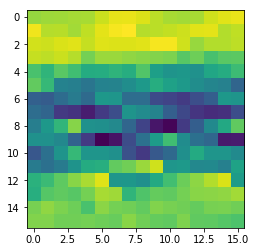

[-3.121  -2.3959 -1.623  -1.0608 -0.805   1.822   3.9139  3.9988  2.9739
 -0.4521 -1.1486 -1.3532 -0.8731  2.301   3.5162  4.2763]


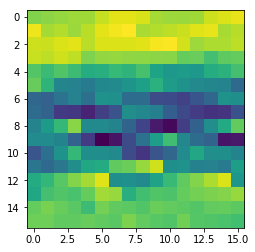

[-3.8305 -3.2322 -2.5994 -1.8234 -1.4982  0.497   2.6284  2.9856  2.8977
 -1.2182 -1.6583 -2.1428 -1.764   0.6586  2.1086  3.0888]


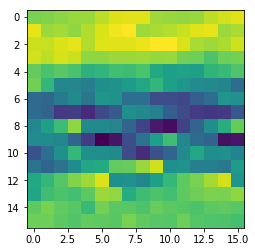

[-6.6599 -6.3704 -5.9805 -5.0527 -4.2556 -1.8922  0.4612  1.1077  1.4153
 -4.744  -5.2618 -5.3417 -4.7989 -1.9177 -0.1305  1.2025]


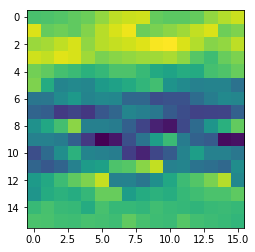

[-5.9737 -5.884  -5.6405 -5.0477 -5.0172 -2.6267 -0.6424 -0.0516  1.0535
 -4.2827 -4.9671 -5.6152 -5.4057 -2.6272 -1.3449 -0.2474]


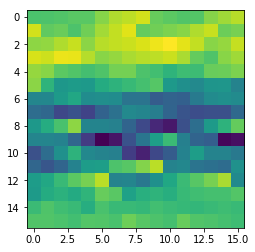

[-7.5103 -7.8968 -8.1049 -7.1368 -6.7625 -4.6053 -2.37   -1.2716  0.8731
 -5.7742 -6.9502 -7.5982 -7.4923 -5.042  -3.2085 -1.951 ]


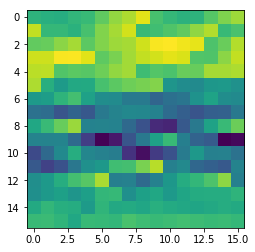

[-8.0983 -8.9304 -9.4641 -9.0561 -8.4878 -6.3168 -4.1933 -2.896  -0.5078
 -7.299  -8.7864 -9.3329 -9.2568 -6.7448 -5.0544 -3.625 ]


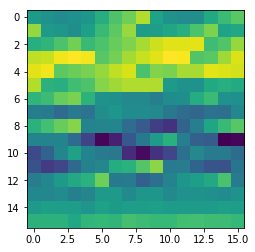

[ -8.0591  -9.2238  -9.9611  -9.4121  -9.4431  -7.2502  -5.2352  -3.9938
  -0.5131  -7.2222  -8.795   -9.6542 -10.0144  -7.4118  -6.0006  -4.7197]


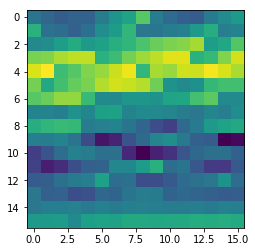

[ -7.3367  -8.9785 -10.2034  -9.5927 -10.0761  -7.9827  -6.3346  -5.3581
  -1.5976  -6.47    -8.5814  -9.4191 -10.3708  -7.7531  -6.6605  -5.7951]


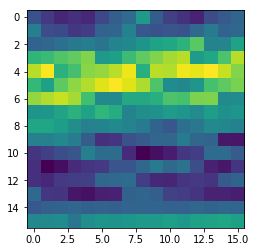

[ -7.8036  -9.359  -10.2077 -10.2711 -10.3327  -8.6412  -7.3346  -6.3875
  -2.3988  -7.5765  -9.193   -9.1493  -9.9313  -7.4115  -7.0999  -6.3465]


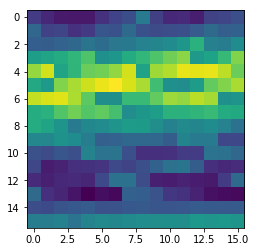

[ -6.8106  -8.8941 -10.1839 -10.2236 -10.7777  -9.4825  -8.6331  -7.9349
  -3.6601  -6.5532  -8.6187  -9.1363  -9.9722  -7.9972  -7.8263  -7.1773]


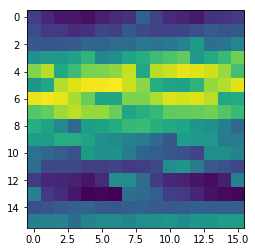

[ -5.7214  -8.0173  -9.7565  -9.721  -10.9323  -9.6189  -9.2375  -8.6482
  -3.5286  -5.7676  -7.7641  -8.5697  -9.7606  -8.0433  -8.2172  -8.0152]


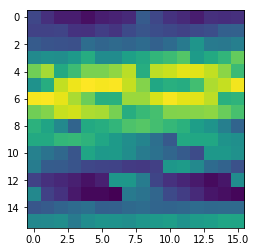

[ -7.0535  -8.9997 -10.0129  -9.9359 -10.8706  -9.817   -9.7458  -9.4484
  -4.4735  -7.3043  -8.4027  -8.4968  -9.3629  -7.7135  -8.3444  -8.0746]


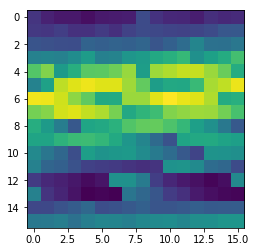

[ -5.9835  -8.1026  -9.1435  -9.6395 -11.3099 -10.2643 -10.4837 -10.0756
  -4.4055  -6.481   -7.7281  -8.5095  -9.4574  -8.0186  -9.2059  -9.0328]


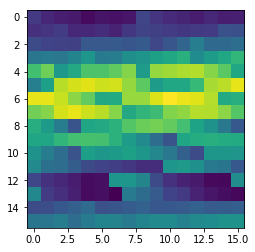

[ -4.8125  -6.8613  -8.0438  -8.3386 -10.2677 -10.0981 -10.5956 -10.1951
  -4.1634  -5.3633  -6.1066  -7.152   -8.2538  -7.7677  -9.098   -9.0504]


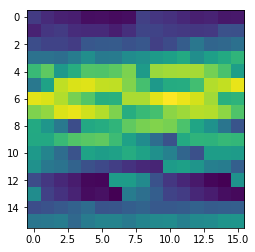

[ -5.0274  -6.819   -7.5362  -8.1019 -10.0537 -10.418  -11.2839 -10.7687
  -4.26    -5.62    -5.9411  -7.0905  -7.9748  -8.1795  -9.8025  -9.6808]


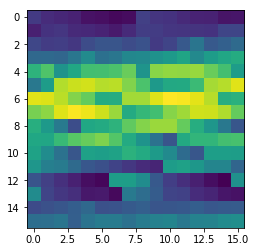

[ -3.5776  -5.7584  -6.9144  -7.7108 -10.1135 -10.4501 -11.4755 -10.7559
  -3.8164  -4.3786  -5.2951  -6.9045  -7.8404  -8.1315  -9.8894  -9.8784]


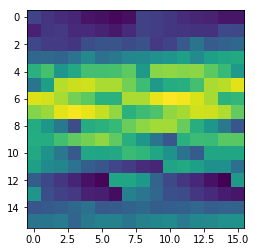

[ -4.2946  -6.4624  -7.543   -8.3252 -10.5115 -11.0083 -11.9312 -11.1724
  -4.0534  -5.2929  -5.9137  -7.5959  -8.6491  -9.1497 -10.7448 -10.5714]


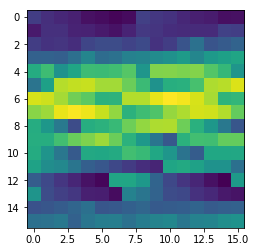

[ -5.7032  -7.7238  -8.8382  -9.4208 -10.9337 -11.6937 -12.4915 -11.2956
  -4.025   -6.6975  -7.2495  -8.8897  -9.7326 -10.8138 -11.7574 -11.3919]


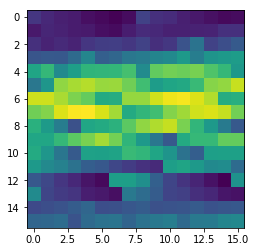

[ -6.4347  -8.5872  -9.4288 -10.3214 -11.3539 -11.727  -12.1007 -10.7429
  -4.1398  -7.7441  -8.5279  -9.9718 -10.6123 -11.0319 -11.8148 -11.0214]


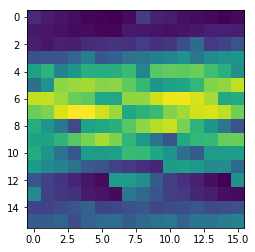

[ -5.5323  -7.685   -8.2299  -9.4921 -10.6207 -11.2218 -11.5785 -10.2253
  -4.5038  -6.7196  -7.6625  -9.3366  -9.8136 -10.4693 -11.4139 -10.4259]


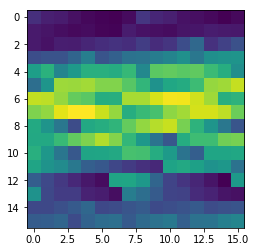

[ -6.5549  -8.548   -8.6904 -10.2105 -10.843  -11.3407 -11.6626 -10.3478
  -4.5424  -8.0866  -8.5234  -9.7344 -10.1525 -10.5611 -11.6628 -10.5895]


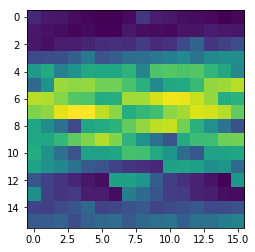

[ -6.9746  -9.368   -9.6316 -11.3486 -11.7068 -12.0763 -11.7831 -10.0062
  -4.3641  -9.0317  -9.8666 -11.2475 -11.4517 -11.489  -12.2298 -10.4826]


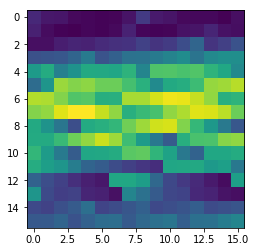

[ -7.842  -10.1387 -10.0848 -11.7677 -11.6792 -12.2182 -11.7374  -9.7223
  -4.3494  -9.7127 -10.5244 -11.8497 -11.7337 -12.049  -12.4617 -10.3986]


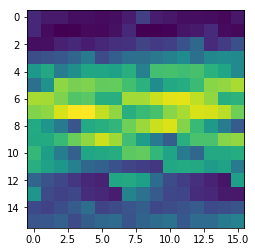

[ -8.1887 -10.2163 -10.0069 -11.8763 -11.2927 -11.6721 -11.3229  -9.5846
  -4.4048 -10.6011 -10.8241 -11.8706 -11.6638 -11.8091 -12.2402 -10.2734]


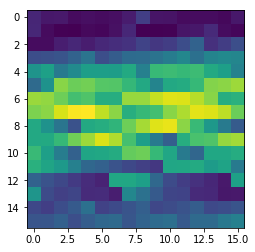

[ -8.0321  -9.5958  -8.9308 -10.6258 -10.2045 -10.9654 -10.8136  -9.0564
  -4.4464 -10.0152  -9.9532 -11.1046 -10.5171 -11.3306 -11.788   -9.8214]


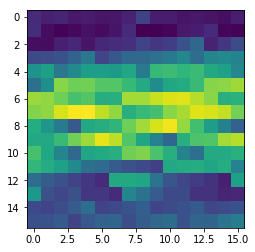

[ -8.1444  -9.3186  -8.3196 -10.1406  -9.4005 -10.2947 -10.2071  -8.6538
  -4.3752 -10.466   -9.8825 -10.6596 -10.0693 -10.8785 -11.4318  -9.4452]


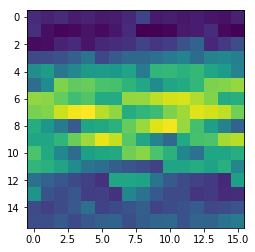

[-6.418  -7.2318 -6.1036 -7.698  -7.3822 -8.609  -8.6491 -7.5021 -3.9096
 -8.0742 -7.2425 -8.3389 -7.9423 -9.1266 -9.822  -8.1825]


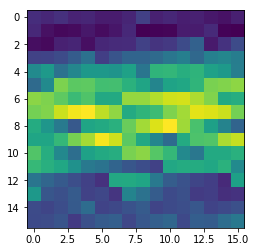

[-3.7527 -4.0287 -2.7287 -4.252  -4.6355 -6.0498 -6.9056 -6.4729 -3.3346
 -5.127  -4.004  -5.1747 -4.8789 -6.4403 -7.7307 -6.8657]


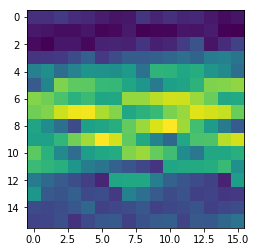

[-1.2441 -1.4941 -0.2807 -1.759  -2.7741 -4.3858 -5.5191 -5.4399 -2.7804
 -2.3779 -1.4986 -2.6788 -2.6165 -4.2818 -6.0061 -5.5407]


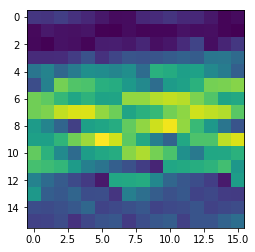

[ 0.9675  0.8266  2.016   0.207  -0.8733 -2.3563 -3.7358 -3.9934 -1.5769
 -0.2306  0.7317 -0.2176 -0.4558 -1.8753 -4.0129 -4.0283]


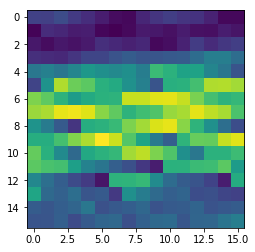

[ 3.8884  3.7687  4.577   2.7013  1.3584 -0.3889 -2.0321 -2.7254 -1.6902
  2.9126  3.4884  2.3093  1.919   0.1953 -2.0284 -2.5091]


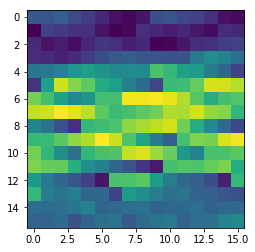

[ 6.6919  6.1445  6.5895  4.779   2.5893  0.9393 -0.7081 -1.6159 -0.7285
  6.1214  5.8774  4.497   3.7516  2.2392 -0.3391 -1.1154]


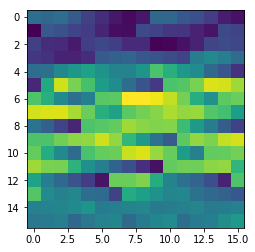

[ 8.2677  7.648   8.1098  5.7886  3.9571  2.2543  0.7267 -0.4516 -0.3565
  7.6393  7.1973  5.9392  5.0538  3.5494  0.8674 -0.0609]


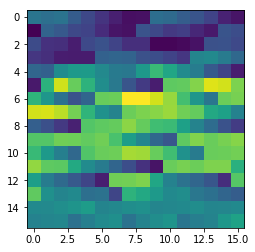

[9.6675 8.76   9.1096 6.4352 4.4726 3.0953 1.6716 0.6969 0.4939 8.9459
 7.9128 6.6713 5.7863 4.6745 1.8527 0.948 ]


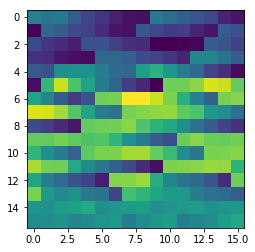

[11.3133 10.0817 10.1022  7.4198  5.3682  3.9151  2.6962  1.6879  0.7269
 11.1074  9.3791  7.7247  6.5703  5.2135  2.6892  1.7378]


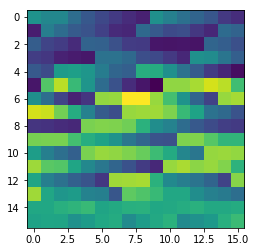

[12.0088 10.7068 10.871   7.661   6.0149  4.3849  3.5025  2.7341  1.4856
 11.5273  9.6118  8.1662  6.9601  5.5427  2.9693  2.1777]


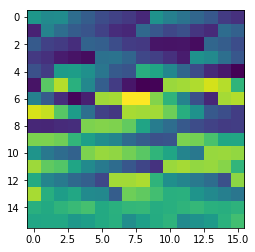

[13.0329 11.3291 11.1395  8.0212  5.9526  4.3416  3.6431  2.891   0.9983
 12.8438 10.2478  8.2072  6.9394  5.5094  3.1901  2.6668]


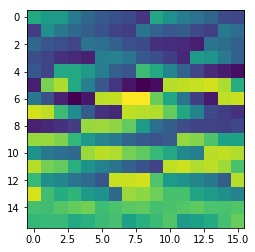

[14.5749 13.1785 13.278   9.7953  7.3006  5.6671  4.6549  3.8184  2.3584
 14.7612 12.1645  9.7168  8.3493  6.509   3.8652  3.0053]


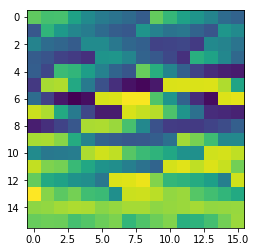

[14.6905 13.275  13.3342  9.8615  7.1773  5.2081  4.4548  3.6558  2.2348
 15.1249 12.5493 10.1768  8.4232  6.5108  3.722   2.9202]


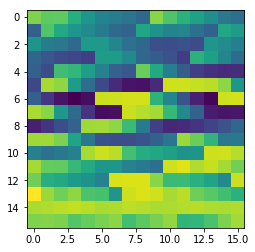

[16.1701 14.6848 14.5777 10.8718  7.8467  5.8545  4.856   3.9364  2.3864
 16.8136 13.9545 11.2749  9.4616  7.4097  4.4348  3.456 ]


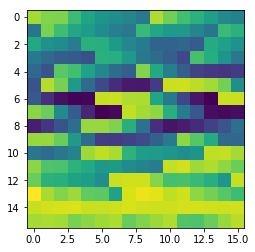

[17.5122 16.3583 16.3333 12.8333  9.011   6.8261  5.4738  4.1838  2.7818
 18.6037 16.075  13.1537 10.9908  8.7607  5.3638  4.0226]


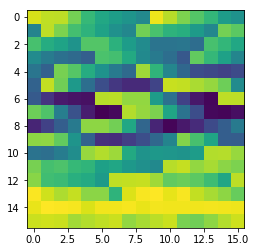

[17.8207 16.5905 16.4085 12.6798  8.6055  6.5774  5.0885  3.7436  2.9315
 18.6403 16.2314 13.5394 11.2554  9.3754  5.5413  4.0755]


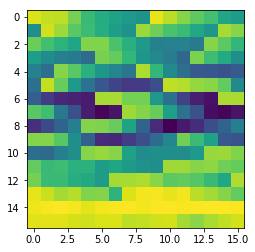

[18.9006 17.4525 16.8066 13.3073  8.7016  6.5006  5.0213  3.73    3.2753
 20.1168 17.5992 14.3483 11.7325  9.6185  5.8097  4.2039]


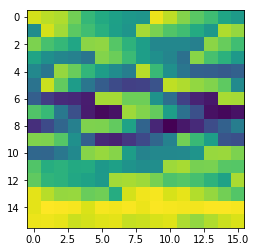

[19.8937 18.2336 17.2371 13.7115  8.3582  6.6271  4.9081  3.5583  3.2921
 21.3121 18.2342 14.6244 12.0568 10.4235  6.3441  4.5305]


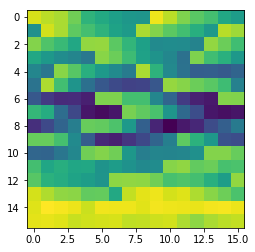

[20.0746 18.0802 16.6733 13.5234  7.7804  6.5105  4.9741  3.5388  3.0229
 21.6803 18.4773 14.7958 11.9622 10.8513  6.7757  4.851 ]


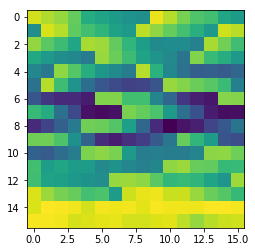

[18.9801 16.8262 15.3488 12.1632  6.7783  5.9254  4.6044  3.3102  3.4129
 20.6278 17.1118 13.5912 10.9207 10.3278  6.4709  4.6433]


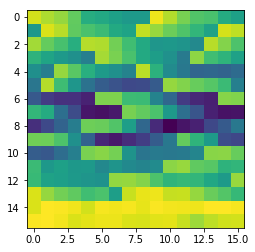

[18.1963 15.7104 14.127  11.2726  5.726   5.0267  4.2068  3.424   3.1515
 20.0305 15.9811 12.3671  9.9106  9.6228  6.1213  4.8733]


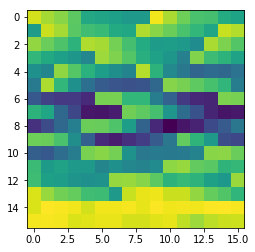

[15.617  12.9887 11.3151  8.4891  4.1164  3.7348  3.3875  3.0818  3.1943
 17.0051 12.9107 10.0181  7.7817  7.8546  4.9944  4.0937]


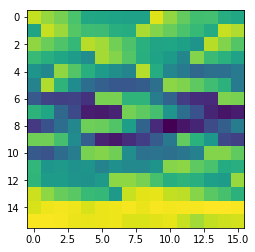

[13.3732 10.3304  8.7126  5.8131  1.9356  2.2068  2.5217  2.7322  3.1058
 14.8224 10.0756  7.2634  5.3706  6.3608  3.9285  3.5793]


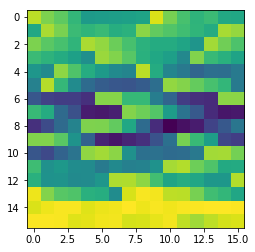

[8.2933 5.9612 4.8891 2.6028 0.141  0.6565 1.4391 2.0531 2.159  9.3483
 5.8737 3.8552 2.6815 3.7458 2.2761 2.5723]


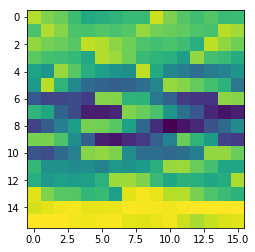

[ 5.6031  3.3469  2.7021  0.5943 -1.4305 -0.4555  0.8745  1.7412  2.0018
  6.8446  3.2791  1.5542  0.6032  2.2313  1.1095  1.7809]


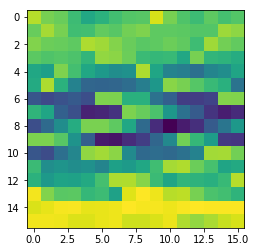

[ 2.7973  0.7481  0.3502 -1.408  -2.8989 -1.939  -0.061   1.3291  2.3331
  3.7462  1.0322 -0.564  -1.1817  0.4485 -0.2164  1.0314]


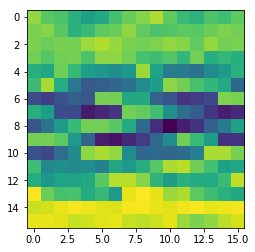

[-0.6851 -2.2415 -2.0832 -3.54   -3.9089 -2.8701 -0.7743  0.8998  2.1799
  0.3511 -1.7159 -2.4922 -2.5324 -0.8278 -1.0422  0.413 ]


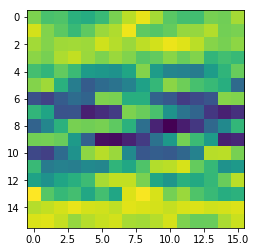

[-3.1382 -4.1632 -3.7371 -4.9006 -4.6199 -3.291  -0.9192  1.101   2.1983
 -2.6343 -3.8667 -4.3179 -3.9653 -2.1611 -1.8778 -0.1614]


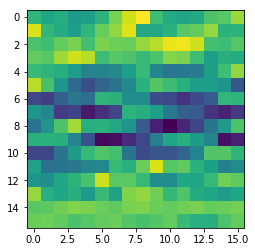

[-6.6855 -6.9777 -5.7353 -6.0035 -5.1777 -3.6    -1.0079  0.865   1.791
 -5.9217 -5.9742 -5.8302 -5.0496 -3.0197 -2.3228 -0.3592]


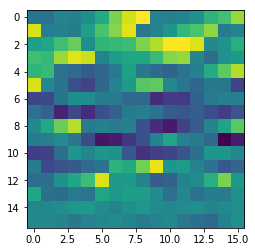

[-7.8524 -7.6949 -5.9728 -5.8403 -5.0876 -3.0713 -0.5049  1.3796  2.7826
 -6.9461 -6.4156 -6.0297 -4.8383 -2.5139 -1.9101 -0.0772]


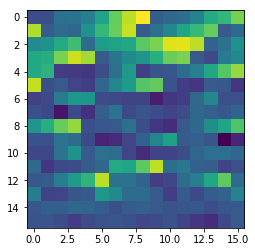

[-9.1073 -8.7307 -7.2216 -6.2089 -5.4158 -2.877  -0.5705  1.0145  2.2706
 -8.0326 -7.5325 -6.9208 -5.607  -3.0873 -2.0224 -0.6272]


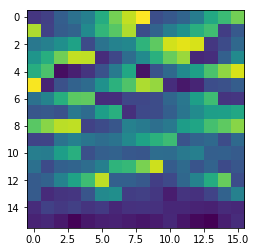

[-11.533  -10.7766  -9.0242  -7.6423  -6.4953  -3.3356  -0.9116   0.5423
   2.014  -10.6764  -9.6048  -8.4714  -6.8998  -3.6888  -2.5291  -1.2519]


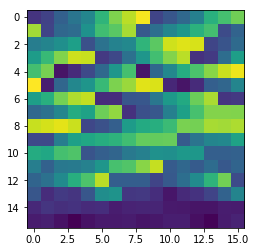

[-13.0802 -12.2144 -10.3559  -8.364   -6.945   -3.4391  -1.0246   0.2487
   1.7719 -11.8055 -10.8022  -9.4356  -7.8357  -4.507   -2.9294  -1.8413]


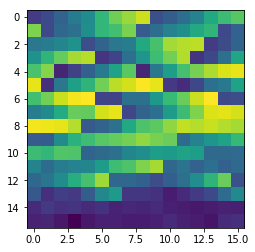

[-15.053  -14.0351 -12.3689  -9.6287  -8.1089  -3.801   -1.2966  -0.2306
   0.8259 -13.7971 -12.6581 -11.2106  -9.65    -5.8213  -3.6628  -2.7354]


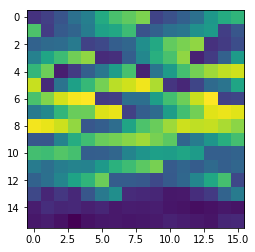

[-16.3482 -14.9033 -12.6401  -9.8365  -8.6041  -4.0181  -1.9462  -0.9689
   1.0154 -15.3567 -13.3566 -11.7338  -9.8871  -6.0931  -4.4005  -3.5966]


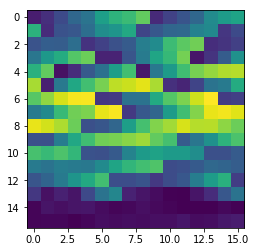

[-18.643  -17.1816 -14.9755 -12.0122 -10.2221  -5.6192  -3.2814  -2.1691
  -0.2662 -17.8938 -15.8927 -14.1561 -12.3301  -8.4896  -6.2771  -5.211 ]


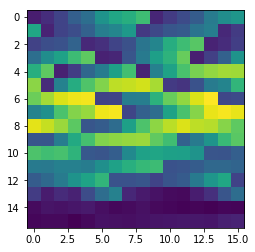

[-18.9284 -17.5265 -14.9095 -12.2401 -10.8613  -6.1695  -3.8099  -2.5689
  -0.3422 -18.4291 -16.2455 -14.6285 -12.9222  -9.0551  -7.2732  -6.0067]


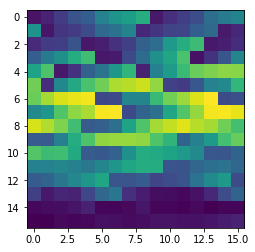

[-19.1205 -17.63   -14.8091 -12.3799 -11.0734  -6.9086  -4.8816  -3.7325
  -1.1509 -18.644  -16.3171 -14.7157 -13.0754  -9.7519  -8.263   -7.0264]


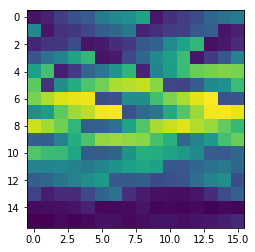

[-19.4988 -17.9431 -14.8446 -12.7357 -11.0866  -7.747   -5.7374  -4.0882
  -1.1299 -19.2471 -16.7557 -14.8833 -12.9631 -10.3456  -9.0093  -7.4774]


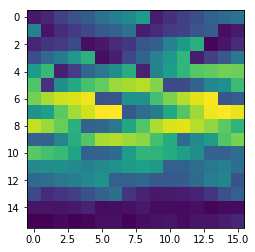

[-20.53   -18.7531 -15.1142 -13.1095 -11.4112  -8.6546  -6.5579  -4.6471
  -0.8827 -20.206  -17.1042 -15.279  -13.3363 -11.2059 -10.027   -8.1179]


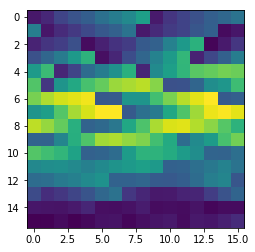

[-19.8628 -17.9116 -14.2738 -12.5222 -10.8234  -8.4382  -6.6639  -5.073
  -1.813  -19.7053 -16.4146 -14.5273 -12.6528 -10.7522  -9.8637  -8.1557]


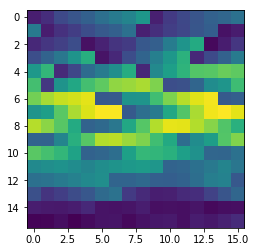

[-18.5716 -16.5577 -12.6859 -11.4563  -9.6617  -8.0127  -6.4791  -4.8038
  -1.4993 -18.6759 -15.382  -13.4807 -11.4108 -10.1897  -9.6139  -7.7994]


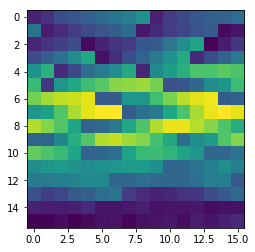

[-17.0745 -15.1105 -11.099  -10.3216  -8.9721  -7.5913  -6.1309  -4.4923
  -1.4155 -17.08   -13.9906 -12.2446 -10.3849  -9.149   -9.1243  -7.3861]


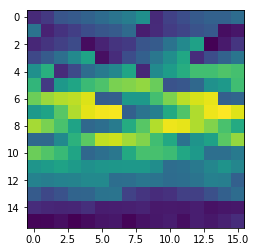

[-16.2835 -14.0479 -10.1508  -8.979   -8.258   -7.5531  -6.6878  -5.5762
  -2.5457 -16.0848 -12.4821 -11.0392  -9.4565  -9.1103  -9.3186  -7.9365]


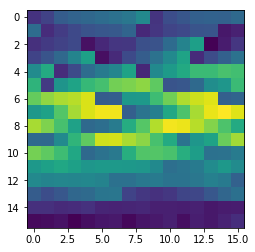

[-16.3211 -14.017  -10.1429  -9.1926  -8.2822  -7.6376  -6.9789  -5.6359
  -2.2164 -16.3564 -12.7939 -11.1785  -9.4243  -9.133   -9.4199  -8.1199]


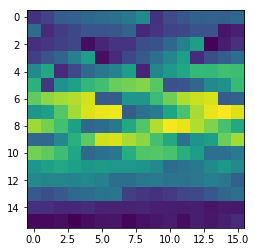

[-13.7444 -11.9889  -8.623   -8.2909  -8.2617  -7.8033  -7.4425  -6.3929
  -3.062  -14.0786 -11.2961 -10.34    -8.9773  -8.7524  -9.6317  -8.5269]


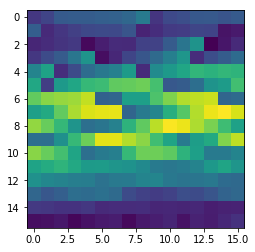

[-12.758  -11.6068  -8.7687  -8.8707  -9.5223  -8.8575  -8.3999  -7.0705
  -3.1019 -13.269  -11.3965 -11.1821 -10.126   -9.8096 -10.859   -9.758 ]


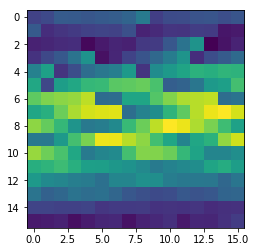

In [147]:
#Could not turn it to video 
c= EEGM_x[0]
c=c.reshape(16, 16) # this is the size of my pictures
#im=plt.imshow(c)
for row in EEGM_x[:100,:]:
    row=row.reshape(16, 16) # this is the size of my pictures
    #im=plt.imshow(row)
    im.set_data(row)
    plt.imshow(row)
    plt.pause(0.001)
plt.show()

## Video with CNN